In [1]:
from __future__ import print_function, division
%run ../basics.ipynb

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show_config']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

Using Theano backend.


In [2]:
df = pd.read_csv('../data/auto_tagging.csv')
df['tag'] = df['tag'].apply(lambda x: ' '.join(x.split(' | ')))
display(df.head(2))

print(df.columns)
print(df.count()/len(df)*100)

id  \
0  http://videolectures.net/acml2013_herbrich_rea...   
1  http://videolectures.net/acml2013_lin_cost_sen...   

                                         description  \
0  The last ten years have seen a tremendous grow...   
1  Classification is an important problem in mach...   

                                               title subtitle  \
0  Distributed, Real-Time Bayesian Learning in On...      NaN   
1  Cost-sensitive Classification: Algorithms and ...      NaN   

                               tag syllabus  fold_num  
0  machine_learning video in_depth      NaN         2  
1  machine_learning video in_depth      NaN         2

Index([u'id', u'description', u'title', u'subtitle', u'tag', u'syllabus',
       u'fold_num'],
      dtype='object')
id             100.000000
description     83.535109
title           99.757869
subtitle        28.087167
tag            100.000000
syllabus        11.138015
fold_num       100.000000
dtype: float64


In [3]:
df.head(2)

id  \
0  http://videolectures.net/acml2013_herbrich_rea...   
1  http://videolectures.net/acml2013_lin_cost_sen...   

                                         description  \
0  The last ten years have seen a tremendous grow...   
1  Classification is an important problem in mach...   

                                               title subtitle  \
0  Distributed, Real-Time Bayesian Learning in On...      NaN   
1  Cost-sensitive Classification: Algorithms and ...      NaN   

                               tag syllabus  fold_num  
0  machine_learning video in_depth      NaN         2  
1  machine_learning video in_depth      NaN         2

In [4]:
def all_text(X):
    if isinstance(X, pd.DataFrame):
        concat_x = pd.Series(index=X.index, data='')
        for i in X.columns:
            concat_x += ' ' + X[i].apply(text_cleanup)
        X = concat_x
    #sns.distplot(X.apply(lambda x: len(x.split())), bins=100)
    return X

In [10]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.6, min_df=5, ngram_range=(1 ,3))
text = all_text(df[['title', 'subtitle', 'description', 'syllabus']])
#for v in pd.unique(df['venue']):
#    sns.distplot(text[df['venue'] == v].apply(lambda x: len(x.split())))
#    plt.title(v)
#    plt.show()
#text = text[text.apply(lambda x: len(x.split())) >= 100]
tfidf = vectorizer.fit_transform(text.values)
tfidf, words = filter_word_rep(tfidf, vectorizer.get_feature_names())
print(tfidf.shape)

(413, 2384)


v v v v 	Topic #0	v v v v v

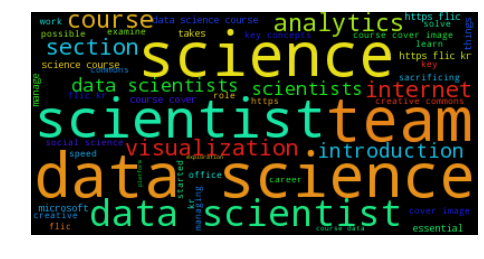

v v v v 	Topic #1	v v v v v

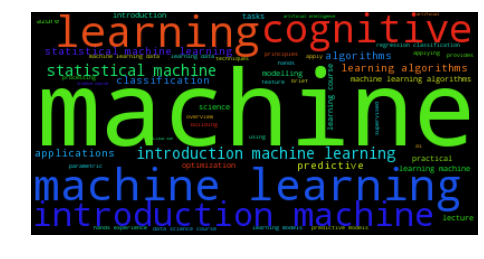

v v v v 	Topic #2	v v v v v

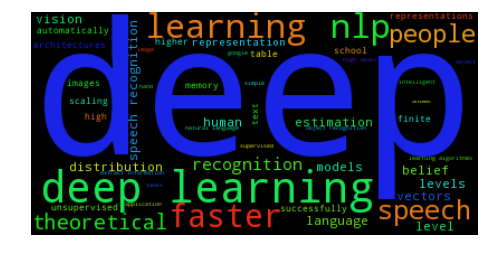

v v v v 	Topic #3	v v v v v

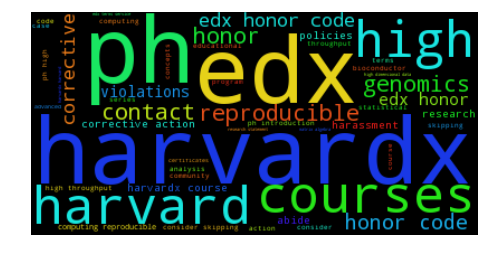

v v v v 	Topic #4	v v v v v

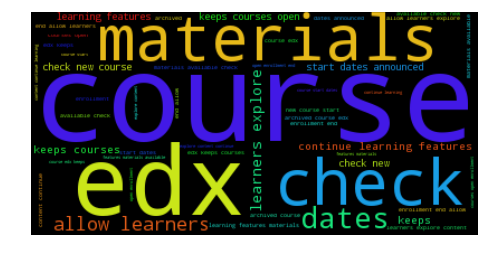

v v v v 	Topic #5	v v v v v

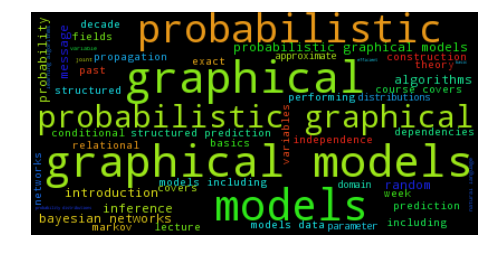

v v v v 	Topic #6	v v v v v

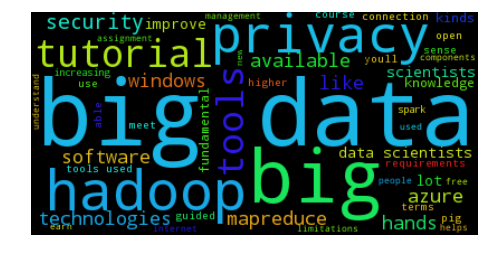

v v v v 	Topic #7	v v v v v

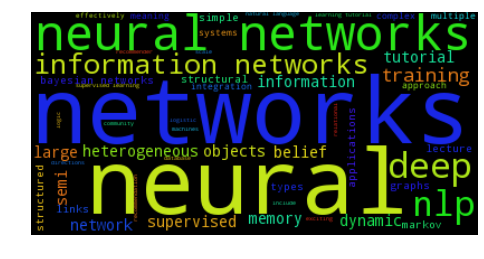

v v v v 	Topic #8	v v v v v

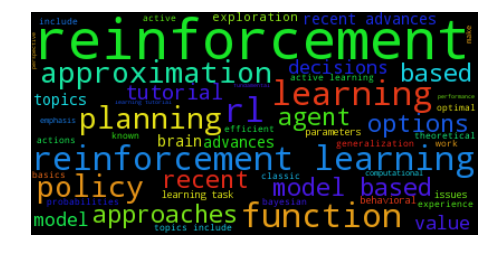

v v v v 	Topic #9	v v v v v

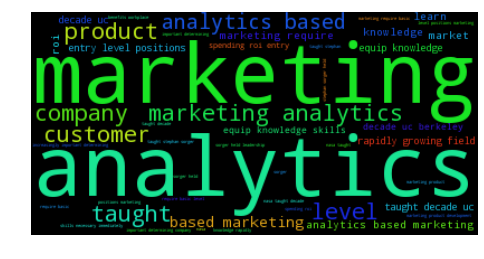

v v v v 	Topic #10	v v v v v

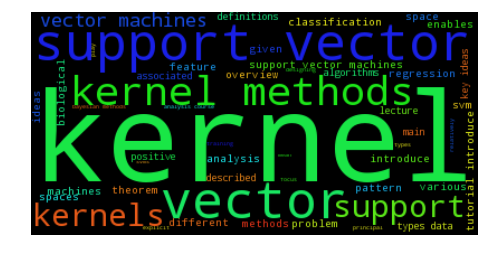

v v v v 	Topic #11	v v v v v

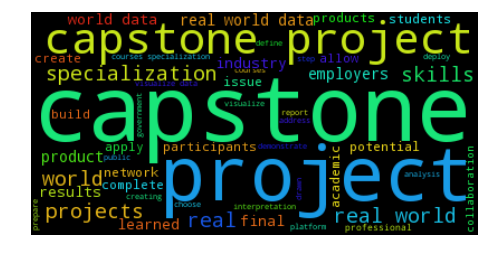

v v v v 	Topic #12	v v v v v

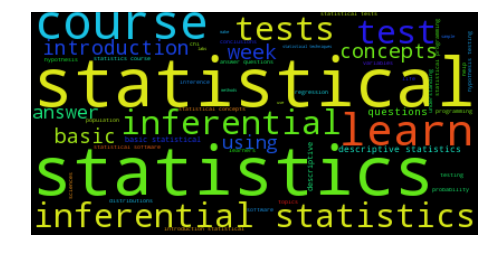

v v v v 	Topic #13	v v v v v

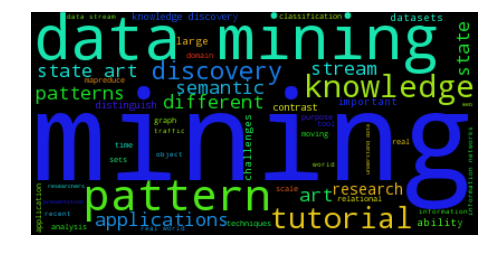

v v v v 	Topic #14	v v v v v

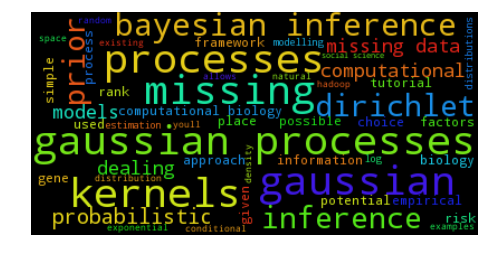

v v v v 	Topic #15	v v v v v

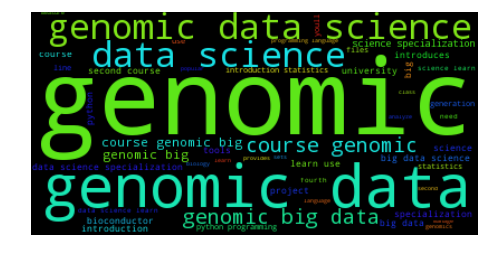

v v v v 	Topic #16	v v v v v

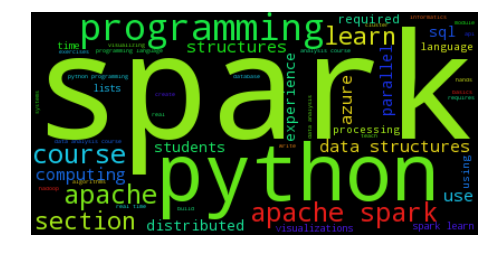

v v v v 	Topic #17	v v v v v

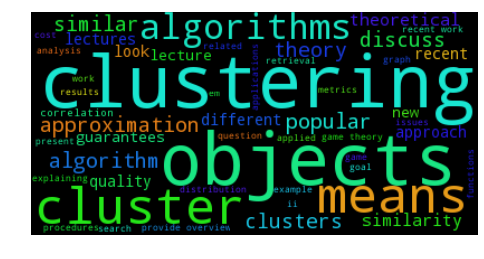

v v v v 	Topic #18	v v v v v

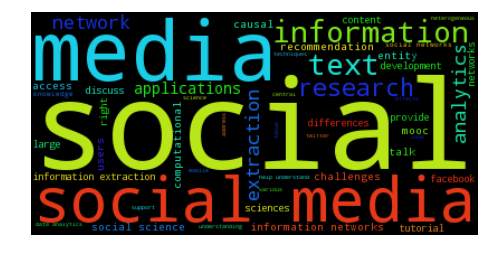

v v v v 	Topic #19	v v v v v

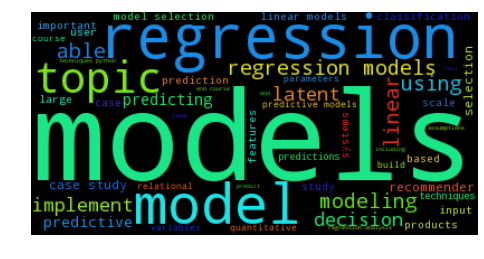

v v v v 	Topic #20	v v v v v

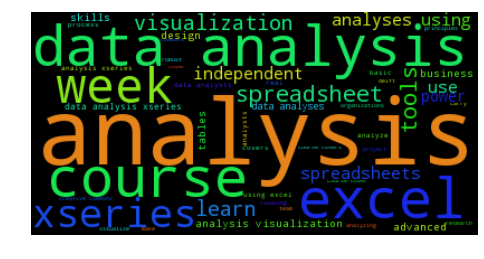

v v v v 	Topic #21	v v v v v

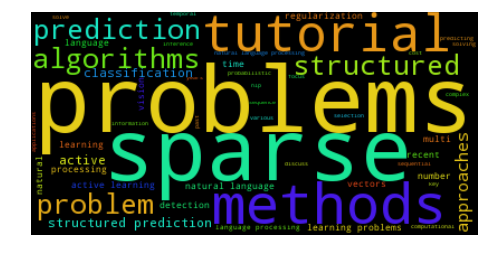

v v v v 	Topic #22	v v v v v

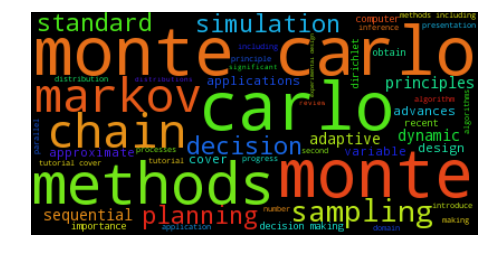

v v v v 	Topic #23	v v v v v

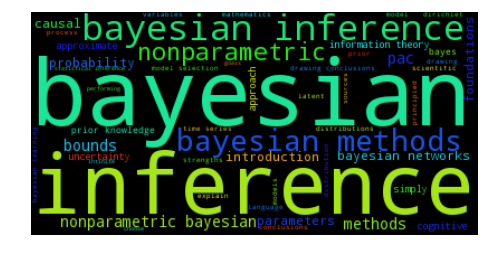

v v v v 	Topic #24	v v v v v

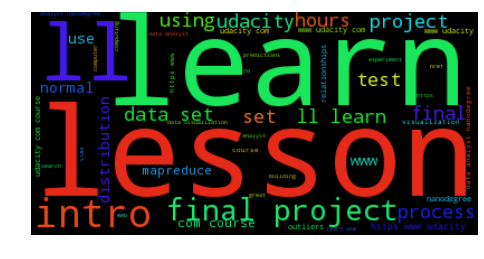

v v v v 	Topic #25	v v v v v

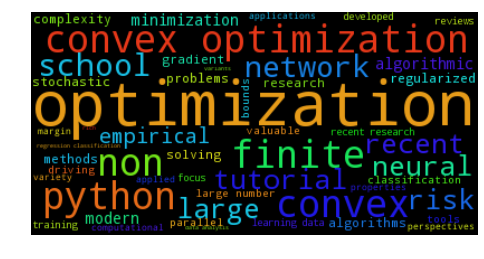

v v v v 	Topic #26	v v v v v

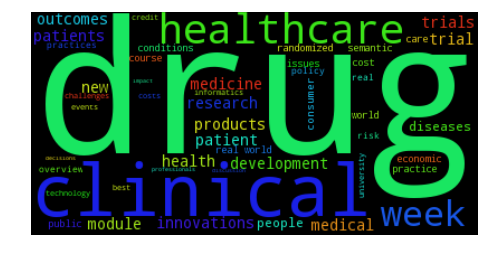

v v v v 	Topic #27	v v v v v

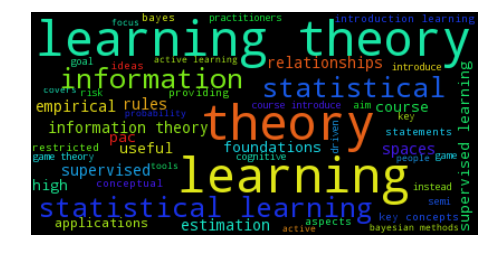

v v v v 	Topic #28	v v v v v

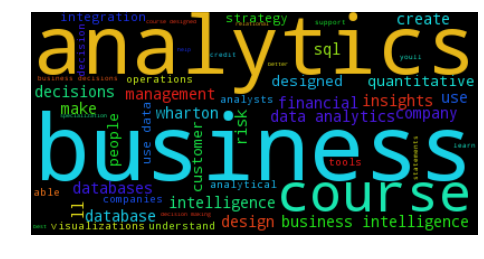

v v v v 	Topic #29	v v v v v

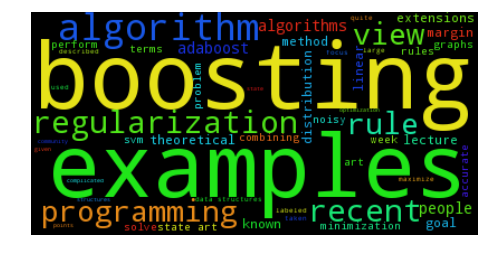

In [11]:
n_topics = 30
n_top_words = 50
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)

feature_names = words
topic_dict = dict()
for topic_idx, topic in enumerate(nmf.components_):
    print("v v v v \tTopic #%d\t" % topic_idx, end='v v v v v')
    topic_top_words = [feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]
    topic_top_words_vals = sorted(topic.ravel(), reverse=True)[:n_top_words]
    text_freq = zip(topic_top_words, topic_top_words_vals)
    wordcloud(text_freq)
    topic_top_words = ", ".join(topic_top_words)
    #print(topic_top_words)
    topic_dict[topic_idx] = text_freq

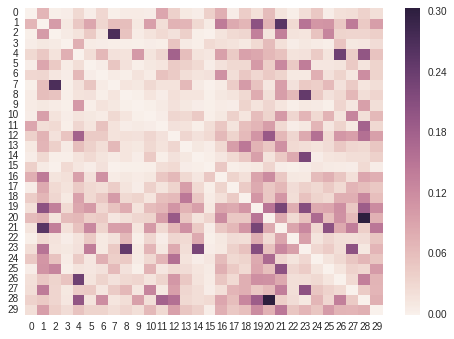

In [12]:
transformed = nmf.transform(tfidf)
df_title_topic = pd.DataFrame(columns=['title'], data=df['title'].values)
df_title_topic['topic id'] = transformed.argmax(axis=1)
plot_topic_coocurrence(transformed)

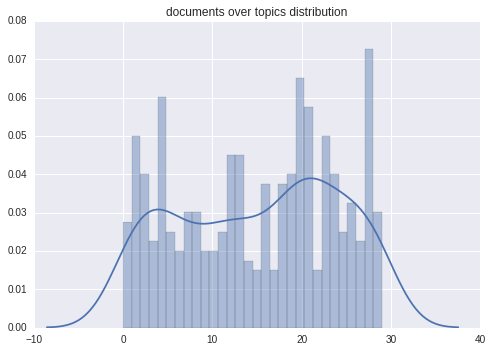

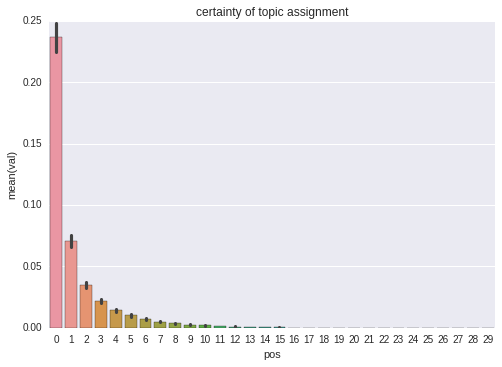

In [13]:
viz_nmf_output(transformed)

In [14]:
%run ../basics.ipynb
dependecies = cross_entropy_prereq(transformed.T, entropy_ge=False, cross_entropy_diff=False, th=0.1)

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

100%|██████████| 30/30 [00:00<00:00, 80.15it/s]


2.52221117597


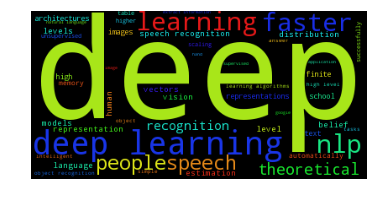

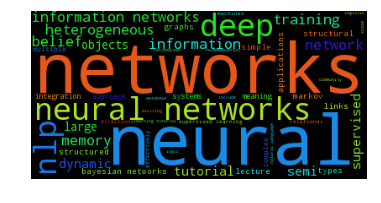

--------------------------------------------------------------------------------
1.85284554313


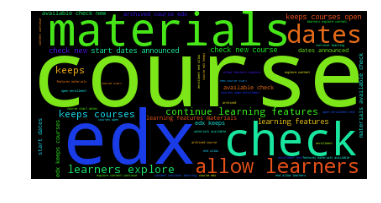

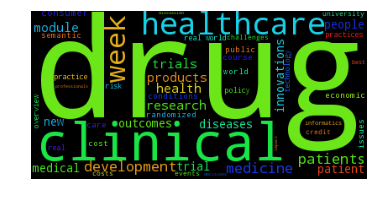

--------------------------------------------------------------------------------
1.54610030269


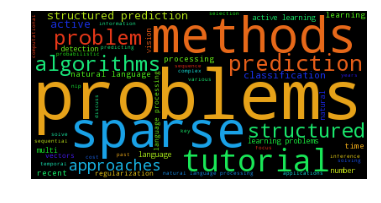

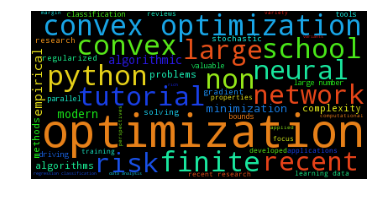

--------------------------------------------------------------------------------
1.53433770926


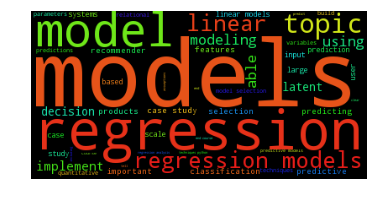

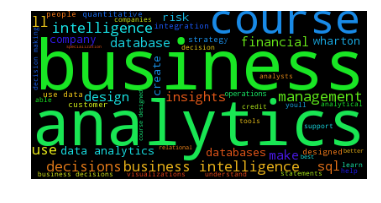

--------------------------------------------------------------------------------
1.33464276409


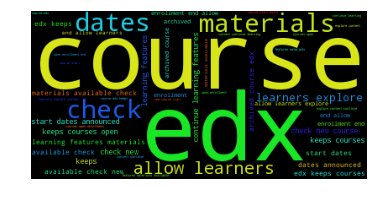

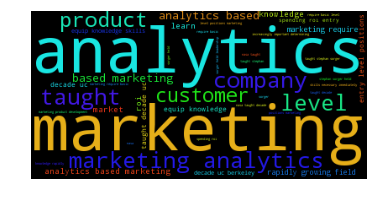

--------------------------------------------------------------------------------
1.30846096682


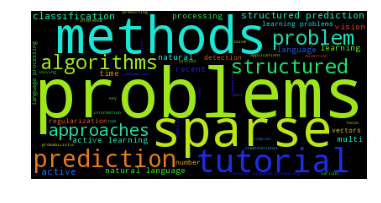

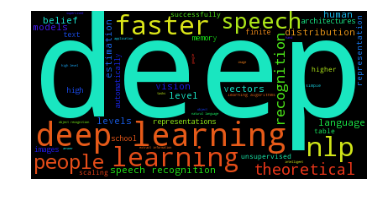

--------------------------------------------------------------------------------
1.25075432195


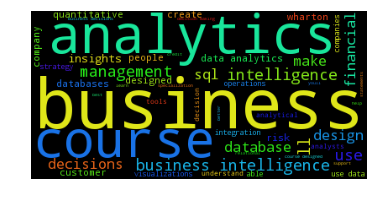

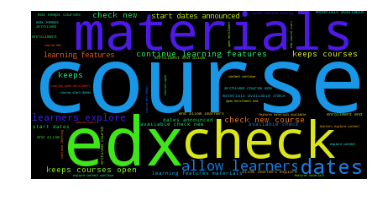

--------------------------------------------------------------------------------
1.22982922172


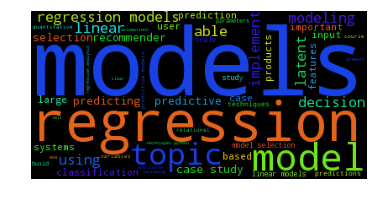

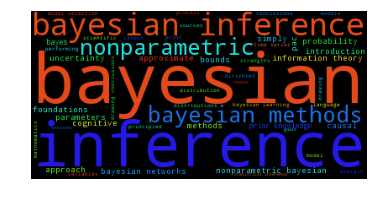

--------------------------------------------------------------------------------
1.19112931664


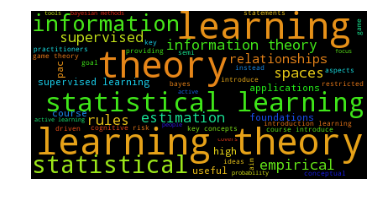

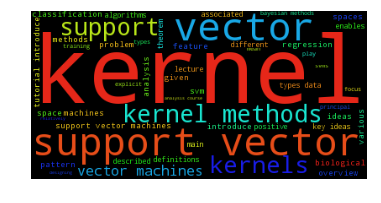

--------------------------------------------------------------------------------
1.13548346318


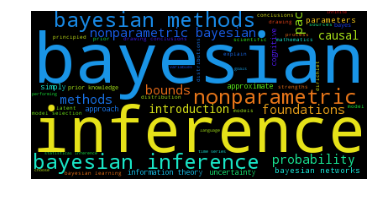

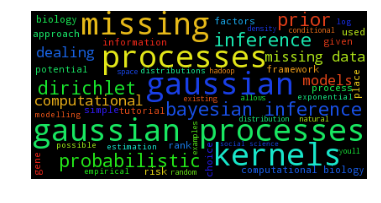

--------------------------------------------------------------------------------
0.973871936698


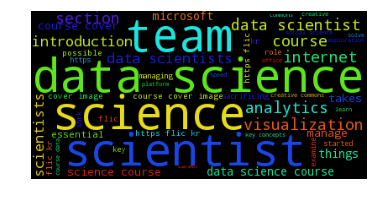

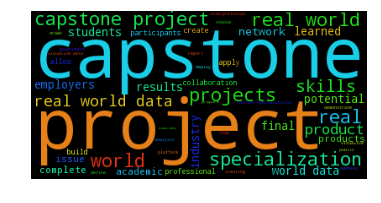

--------------------------------------------------------------------------------
0.966475810984


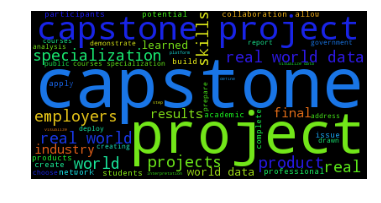

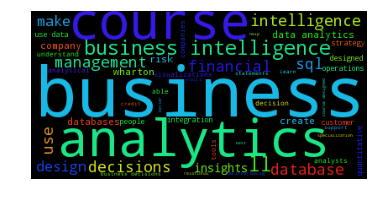

--------------------------------------------------------------------------------
0.959135160984


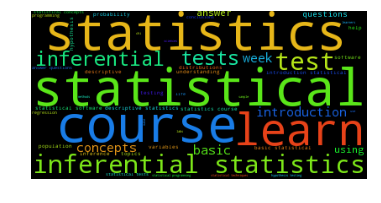

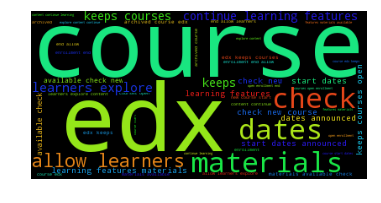

--------------------------------------------------------------------------------
0.955125193628


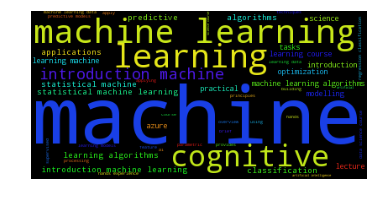

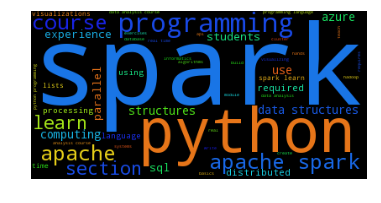

--------------------------------------------------------------------------------
0.906528170658


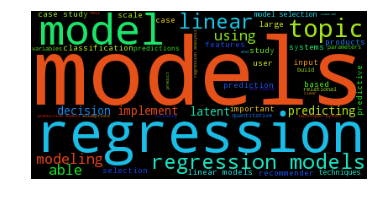

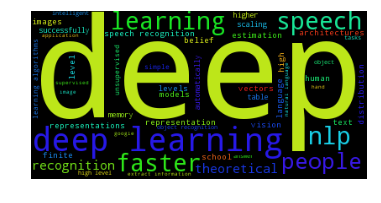

--------------------------------------------------------------------------------
0.86882038051


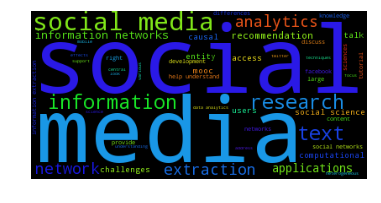

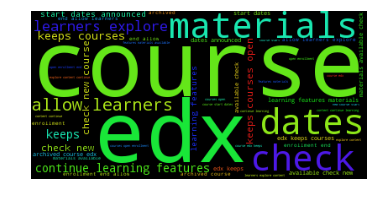

--------------------------------------------------------------------------------
0.846575876041


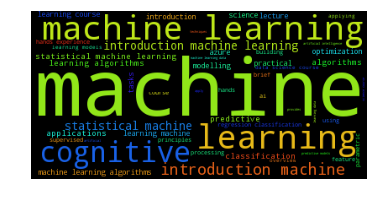

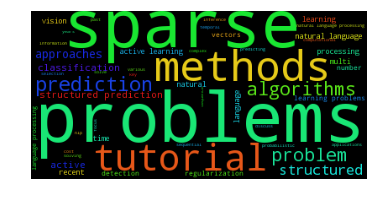

--------------------------------------------------------------------------------
0.780607774109


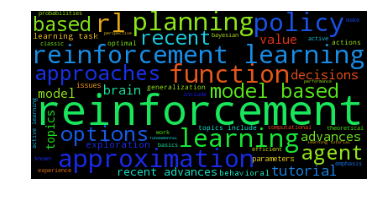

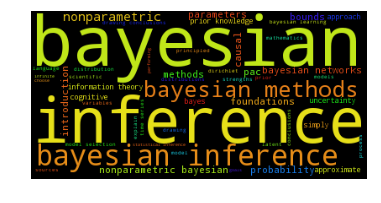

--------------------------------------------------------------------------------
0.753601194551


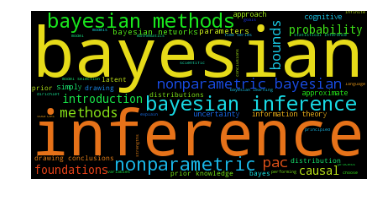

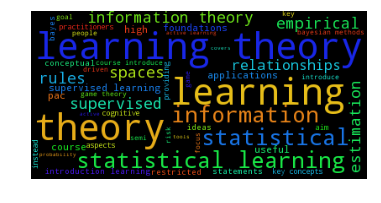

--------------------------------------------------------------------------------
0.720564900245


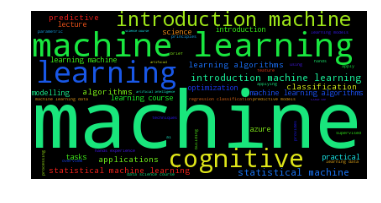

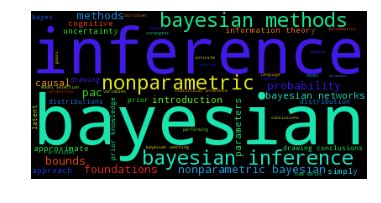

--------------------------------------------------------------------------------


In [15]:
if True:
    dependecies.sort_values(by='val', ascending=False, inplace=True)
else:
    dependecies = pd.DataFrame(dependecies.groupby('t').apply(lambda x: x.loc[x['val'].argmax()])).sort_values(by='val', ascending=False)
for idx, (t_id, prereq_id, val) in dependecies[['t', 'prereq', 'val']].iloc[:20].iterrows():
    print(val)
    wordcloud(topic_dict[t_id])
    wordcloud(topic_dict[prereq_id])
    print('-' * 80)

In [ ]:
pvt = pd.pivot_table(data=dependecies, index='topic', columns='dependency', values='diff2top', aggfunc=lambda x: -1. * np.sum(x))
pvt_vals = pvt.fillna(0).values
for i in range(pvt_vals.shape[0]):
    for j in range(pvt_vals.shape[1]):
        if i == j:
            pvt_vals[i,j] = 0
        elif pvt_vals[i, j] > pvt_vals[j, i]:
            pvt_vals[i, j] = 0
pvt[:] = pvt_vals

In [ ]:
pvt.head(2)

In [ ]:
sns.heatmap(pvt)
plt.ylabel('topic id')
plt.xlabel('depentency topic id')
plt.show()

In [ ]:
mean_df = pd.DataFrame(pvt.mean(axis=1))
mean_df['topic'] = map(lambda x: topic_dict[x], mean_df.index)
mean_df.sort_values(by=0)

In [ ]:
topic_dep = pd.DataFrame(columns=['dep'], data=pvt.idxmax(axis=1))
topic_dep['dep val'] = pvt.max(axis=1)
topic_dep.head(2)

In [ ]:
topic_dep.sort_values(by='dep val', ascending=False, inplace=True)
topic_dep['topic'] = map(lambda x: topic_dict[x], topic_dep.index)
topic_dep['topic dep.'] = map(lambda x: np.nan if x not in topic_dict else topic_dict[x], topic_dep['dep'])
prereq_list = list()
for idx, (dep_val, topic, dep, dep_id) in topic_dep[['dep val', 'topic', 'topic dep.', 'dep']].iterrows():
    if dep_val > .01:
        print('-'*80)
        print(dep_val)
        print('topic id:', idx, 'prereq topic id:', dep_id)
        prereq_list.append((idx, dep_id))
        wordcloud(topic)
        print('^^^^^^^')
        wordcloud(dep)

In [ ]:
%run basics.ipynb
tmp = df_title_topic.copy()
tmp['title'] = tmp['title'].apply(lambda x: x.replace(' - VideoLectures.NET', ""))
pg = get_prereq_graph(tmp.values, prereq_list)

In [ ]:
dep_df = dependecies.groupby(by=('topic', 'dependency'),as_index=False).mean().sort_values(by='diff2top')
dep_df['topic'] = map(lambda x: topic_dict[x], dep_df['topic'])
dep_df['dependency'] = map(lambda x: topic_dict[x], dep_df['dependency'])
dep_df